In [6]:
import pandas as pd
df = pd.read_csv('/Users/bintangrestubawono/Downloads/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [21]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

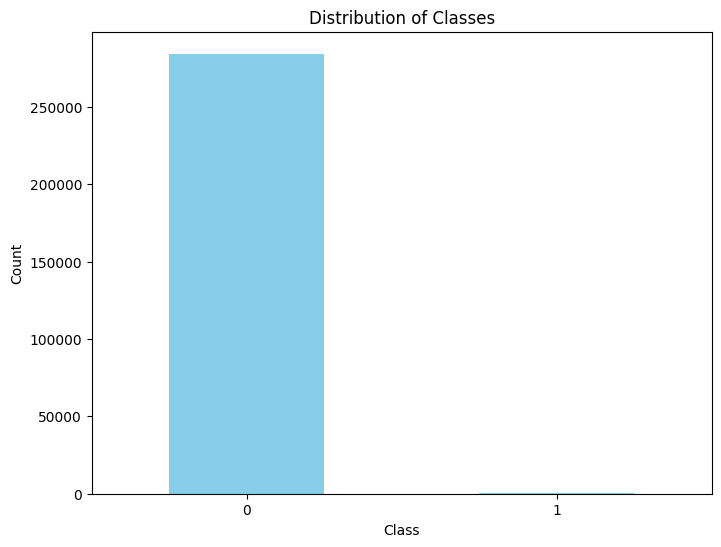

In [19]:
import matplotlib.pyplot as plt

# Calculate the value counts for each class
class_counts = df['Class'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks(rotation=0)  # Keeps x labels horizontal
plt.show()


Original class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

New class distribution after oversampling:
Class
0    284315
1    284315
Name: count, dtype: int64


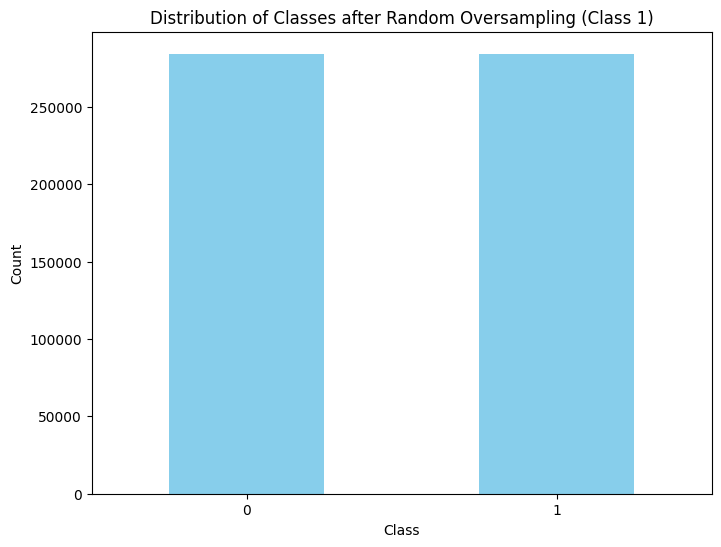

In [20]:
# First, ensure you have imbalanced-learn installed:
# pip install imbalanced-learn

import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Suppose 'df' is your DataFrame and 'Class' is your target column.
# Separate features and target:
X = df.drop('Class', axis=1)
y = df['Class']

# Show original class distribution
print("Original class distribution:")
print(y.value_counts())

# Define the oversampling strategy:
# Here, we oversample class '1' to match the count of the majority class.
majority_count = y.value_counts().max()
# This creates a dictionary that maps the target class 1 to the desired number of samples.
oversample_strategy = {1: majority_count}

# Initialize the RandomOverSampler with the defined strategy:
ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Create a new DataFrame from the resampled data:
df_res = pd.DataFrame(X_res, columns=X.columns)
df_res['Class'] = y_res

# Verify the new distribution:
print("\nNew class distribution after oversampling:")
print(df_res['Class'].value_counts())

# Plot the new distribution:
plt.figure(figsize=(8, 6))
df_res['Class'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes after Random Oversampling (Class 1)')
plt.xticks(rotation=0)
plt.show()


In [2]:
pd.read_csv('evaluation_metrics.csv')

,round,loss,accuracy,f1,recall,precision,auc,num_examples,clipping_norm,dp_noise_stddev,privacy_budget,nsr
0,0,0.708604,0.351177,0.447860,0.525746,0.390073,0.346237,113726.0,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467147,0.048247,0.103280,0.10328
2,1,0.671974,0.515643,0.669475,0.981457,0.507995,0.773989,113726.0,NaN,NaN,NaN,NaN
3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.441837,0.045633,0.146059,0.10328
4,2,0.667096,0.513234,0.671146,0.991609,0.507224,0.819942,113726.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
96,48,1604.282715,0.508767,0.534318,0.564718,0.507024,0.505875,113726.0,NaN,NaN,NaN,NaN
97,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.246766,3.743550,0.722957,0.10328
98,49,1676.142822,0.602123,0.594873,0.582324,0.607976,0.602746,113726.0,NaN,NaN,NaN,NaN
99,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.775640,4.108010,0.730297,0.10328


In [3]:
!pip install tensorflow-macos tensorflow-metal

  Using cached tensorflow_macos-2.16.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached tensorflow_metal-1.1.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (1.2 kB)
  Using cached tensorflow-2.16.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow_macos-2.16.2-cp310-cp310-macosx_12_0_arm64.whl (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 439.3 kB/s eta 0:00:0000:0100:14
Using cached tensorflow_metal-1.1.0-cp310-cp310-macosx_12_0_arm64.whl (1.4 MB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
    extract-msg (<=0.29.*)
                 ~~~~~~~^
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-d

In [7]:
!pip install keras

    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from tf_keras.models import Sequential
from tf_keras.layers import LSTM, Dense, Dropout
from tf_keras.optimizers import Adam,ExponentialDecay
from tf_keras.callbacks import EarlyStopping

In [2]:
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [5]:
df = pd.read_csv('data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Apply SMOTE to balance the classes
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Apply StandardScaler to standardize the data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X)

# Expand dimensions for LSTM compatibility
X_resampled_scaled = np.expand_dims(X_resampled_scaled, axis=1)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_scaled, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class proportions
)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

Data after SMOTE and StandardScaler:
Training set size: (227845, 1, 30), (227845,)
Testing set size: (56962, 1, 30), (56962,)


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Apply Random Oversampling (ROS) to balance the classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Apply StandardScaler to standardize the data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Expand dimensions for LSTM compatibility
X_resampled_scaled = np.expand_dims(X_resampled_scaled, axis=1)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_scaled, 
    y_resampled, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_resampled  # Maintain class proportions in train-test split
)

# Ensure y_train and y_test are reshaped correctly
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (454904, 1, 30) (454904, 1)
Testing data shape: (113726, 1, 30) (113726, 1)


In [ ]:
y_series = pd.Series(y_train.flatten())
counts = y_series.value_counts()
print(counts)

0    227452
1    227452
Name: count, dtype: int64


In [78]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 30)),
    Dropout(0.5),
    Dense(65, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])


# Define the learning rate scheduler
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,  
    decay_steps=1000,            
    decay_rate=0.2,               
    staircase=True                
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best model weights
)

# Use the scheduler in the optimizer
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),  # Add the scheduler here
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50)                16200     
                                                                 
 dropout_12 (Dropout)        (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 65)                3315      
                                                                 
 dropout_13 (Dropout)        (None, 65)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 66        
                                                                 
Total params: 19581 (76.49 KB)
Trainable params: 19581 (76.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
7121/7121 [==============================] - 137s 19ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0052 - val_accuracy: 0.9983
Epoch 2/5
7121/7121 [==============================] - 141s 20ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0052 - val_accuracy: 0.9983
Epoch 3/5
7121/7121 [==============================] - 141s 20ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0052 - val_accuracy: 0.9983
Epoch 4/5
7121/7121 [==============================] - 142s 20ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0052 - val_accuracy: 0.9983
Epoch 5/5
1781/1781 [==============================] - 10s 6ms/step - loss: 0.0052 - accuracy: 0.9983
Test Loss: 0.005218937527388334
Test Accuracy: 0.9982795715332031


In [79]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5


2024-12-14 19:16:45.736666: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_10.
2024-12-14 19:16:45.791760: W tensorflow/core/common_runtime/optimize_function_graph_utils.cc:622] Ignoring multi-device function optimization failure: INVALID_ARGUMENT: Input 3 of node Adam/AssignSubVariableOp_6 was passed int64 from Adam/ReadVariableOp:0 incompatible with expected float.


14216/14216 [==============================] - 291s 20ms/step - loss: 0.1232 - accuracy: 0.9540 - val_loss: 0.1112 - val_accuracy: 0.9592
Epoch 2/5
14216/14216 [==============================] - 272s 19ms/step - loss: 0.1171 - accuracy: 0.9561 - val_loss: 0.1112 - val_accuracy: 0.9592
Epoch 3/5
14216/14216 [==============================] - 268s 19ms/step - loss: 0.1177 - accuracy: 0.9561 - val_loss: 0.1112 - val_accuracy: 0.9592
Epoch 4/5
14216/14216 [==============================] - 271s 19ms/step - loss: 0.1176 - accuracy: 0.9558 - val_loss: 0.1112 - val_accuracy: 0.9592
Epoch 5/5
3554/3554 [==============================] - 21s 6ms/step - loss: 0.1112 - accuracy: 0.9592
Test Loss: 0.1112230122089386
Test Accuracy: 0.9591737985610962


In [81]:
from sklearn.metrics import classification_report
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n")
print(report)

3554/3554 [==============================] - 13s 4ms/step

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96     56863
     Class 1       0.98      0.94      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [84]:
from sklearn.metrics import classification_report
# y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96     56863
     Class 1       0.98      0.94      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [105]:
def getDataset(client_id, num_clients=2, split_ratios=None, file_path='/Users/bintangrestubawono/Documents/skripsi_FL/Skripsi_Federated_Learning/data/creditcard.csv'):
    """
    Split the dataset into distinct portions for each client based on specified ratios.
    Each client fetches its unique portion based on `client_id`.

    Args:
    - client_id (int): ID of the client (0, 1, ..., num_clients - 1).
    - num_clients (int): Total number of clients.
    - split_ratios (list of floats): Ratios for splitting the dataset across clients.
    - file_path (str): Path to the dataset CSV file.

    Returns:
    - X_train (np.ndarray): Training features for the specific client.
    - y_train (np.ndarray): Training labels for the specific client.
    - X_test (np.ndarray): Testing features for the specific client.
    - y_test (np.ndarray): Testing labels for the specific client.
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Step 1: Apply Random Oversampling (ROS) to balance the classes
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Step 2: Apply StandardScaler to standardize the data
    scaler = StandardScaler()
    X_resampled_scaled = scaler.fit_transform(X_resampled)

    # Step 3: Expand dimensions for LSTM compatibility
    X_resampled_scaled = np.expand_dims(X_resampled_scaled, axis=1)

    # Step 4: Prepare split ratios
    if split_ratios is None:
        # Default: Equal split among all clients
        split_ratios = [1 / num_clients] * num_clients

    if len(split_ratios) != num_clients:
        raise ValueError("Number of split_ratios must match the number of clients.")

    if not np.isclose(sum(split_ratios), 1.0):
        raise ValueError("Split ratios must sum to 1.")

    # Step 5: Shuffle data before splitting
    indices = np.arange(len(X_resampled_scaled))
    np.random.shuffle(indices)
    X_resampled_scaled = X_resampled_scaled[indices]
    y_resampled = y_resampled.iloc[indices].reset_index(drop=True)

    # Step 6: Split the dataset into distinct parts for each client
    total_samples = len(X_resampled_scaled)
    start_idx = 0
    client_data = {}

    for i, ratio in enumerate(split_ratios):
        end_idx = start_idx + int(total_samples * ratio)
        if i == num_clients - 1:  # Ensure the last client gets the remaining data
            end_idx = total_samples
        client_data[i] = (X_resampled_scaled[start_idx:end_idx], y_resampled[start_idx:end_idx])
        start_idx = end_idx

    # Fetch data for the specified client
    if client_id not in client_data:
        raise ValueError(f"Invalid client_id: {client_id}. Must be between 0 and {num_clients - 1}.")
    X_client, y_client = client_data[client_id]

    # Step 7: Further split into train and test sets for the client
    X_train, X_test, y_train, y_test = train_test_split(
        X_client, y_client, test_size=0.2, random_state=42
    )

    # Ensure y_train and y_test are reshaped correctly for LSTM
    y_train = y_train.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)

    return X_train, y_train, X_test, y_test

In [111]:
# Define the performance metrics
labels = ["Fight", "No_Fight"]
precision = [0.94, 0.90]
recall = [0.948, 0.90]
f1_score = [0.944, 0.90]
auc_roc = [0.8223, 0.8223]
test_accuracy = 0.922

# Print the formatted table
print("Performance Metrics:")
print(f"{'Label':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'AUC-ROC':<10}")
print("-" * 60)

for i in range(len(labels)):
    print(f"{labels[i]:<15}{precision[i]:<10.4f}{recall[i]:<10.4f}{f1_score[i]:<10.4f}{auc_roc[i]:<10.4f}")

print(f"Test Accuracy: {test_accuracy:.4f}")


Performance Metrics:
Label          Precision Recall    F1-Score  AUC-ROC   
------------------------------------------------------------
Fight          0.9400    0.9480    0.9440    0.8223    
No_Fight       0.9000    0.9000    0.9000    0.8223    
Test Accuracy: 0.9220


In [109]:
x_train, y_train, x_test, y_test = getDataset(client_id=1, num_clients=2)
y_series = pd.Series(y_train.flatten())
print(counts)

0    113754
1    113698
Name: count, dtype: int64


In [110]:
x_train

array([[[-0.46443359, -0.09734954, -0.07742214, ...,  1.40320667,
         -0.80286061,  4.94531843]],

       [[-0.40583426, -1.95110337,  2.9463289 , ...,  1.16596919,
          1.99015422, -0.41132138]],

       [[-1.20433846,  0.47913724,  0.46629291, ...,  0.45978621,
          0.80365502, -0.41258805]],

       ...,

       [[-1.38514087, -2.62351177,  2.10962615, ...,  1.99301156,
         -3.22562175, -0.41132138]],

       [[ 1.24071986,  0.13948637, -0.59652245, ..., -0.21996237,
         -0.10720211,  3.52830759]],

       [[-1.20294719,  0.20829942, -0.57248165, ..., -0.00677706,
          0.17775221,  0.53828726]]])

In [18]:
df1 = pd.read_csv('/Users/bintangrestubawono/Documents/skripsi_FL/Skripsi_Federated_Learning/results/FDFCAC/FDFCAC_0.csv')
df2 = pd.read_csv('/Users/bintangrestubawono/Documents/skripsi_FL/Skripsi_Federated_Learning/results/FDFCAC/FDFCAC_0,01.csv')
df3 = pd.read_csv('/Users/bintangrestubawono/Documents/skripsi_FL/Skripsi_Federated_Learning/results/FDFCAC/FDFCAC_0,03.csv')
df4 = pd.read_csv('/Users/bintangrestubawono/Documents/skripsi_FL/Skripsi_Federated_Learning/results/FDFCAC/FDFCAC_0,1.csv')

In [20]:
df1 = df1.dropna(subset=['accuracy'])
df2 = df2.dropna(subset=['accuracy'])
df3 = df3.dropna(subset=['accuracy'])
df4 = df4.dropna(subset=['accuracy'])

In [23]:
df1

,round,loss,accuracy,f1,recall,precision,auc,num_examples,clipping_norm,dp_noise_stddev,privacy_budget,nsr
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100818,0.001009,0.010013,0.010013
3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120794,0.001209,0.014160,0.010013
5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.145609,0.001458,0.017342,0.010013
7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175217,0.001754,0.020025,0.010013
9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208408,0.002087,0.022389,0.010013
11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253835,0.002542,0.024526,0.010013
13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300610,0.003010,0.026491,0.010013
15,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.349550,0.003500,0.028320,0.010013
17,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.419281,0.004198,0.030038,0.010013
19,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500471,0.005011,0.031662,0.010013


In [24]:
df2

,round,loss,accuracy,f1,recall,precision,auc,num_examples,clipping_norm,dp_noise_stddev,privacy_budget,nsr
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096664,0.002933,0.030343,0.030343
3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116202,0.003526,0.042912,0.030343
5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.139500,0.004233,0.052556,0.030343
7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.166983,0.005067,0.060687,0.030343
9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200889,0.006096,0.067850,0.030343
11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237044,0.007193,0.074326,0.030343
13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.283431,0.008600,0.080281,0.030343
15,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342097,0.010380,0.085824,0.030343
17,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.409489,0.012425,0.091030,0.030343
19,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496239,0.015058,0.095954,0.030343


In [25]:
df3

,round,loss,accuracy,f1,recall,precision,auc,num_examples,clipping_norm,dp_noise_stddev,privacy_budget,nsr
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097460,0.0,0.0,0.0
3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117082,0.0,0.0,0.0
5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142323,0.0,0.0,0.0
7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169469,0.0,0.0,0.0
9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200280,0.0,0.0,0.0
11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238053,0.0,0.0,0.0
13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.283001,0.0,0.0,0.0
15,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338345,0.0,0.0,0.0
17,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405587,0.0,0.0,0.0
19,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.481413,0.0,0.0,0.0


In [21]:
df1['accuracy'].mean()

0.6767567945461647

In [26]:
df2['accuracy'].mean()

0.4621631041461346

In [23]:
df3['accuracy'].mean()

0.5207257712004232

In [27]:
df4['accuracy'].mean()

0.47200702218448415

# Accuracy, Recall, Precision, & F1 Visualization

In [3]:
import pandas as pd
df_FDFCAC_01 = pd.read_csv('./results/FDFCAC/FDFCAC_0,1.csv')
df_FDFCAC_0 = pd.read_csv('./results/FDFCAC/FDFCAC_0.csv')
df_FDFCAC_003 = pd.read_csv('./results/FDFCAC/FDFCAC_0,03.csv')
df_FDFCAC_001 = pd.read_csv('./results/FDFCAC/FDFCAC_0,01.csv')

In [32]:
df_FDFCAC_01_acc = df_FDFCAC_01.dropna(subset=['accuracy'])
df_FDFCAC_0_acc = df_FDFCAC_0.dropna(subset=['accuracy'])
df_FDFCAC_003_acc = df_FDFCAC_003.dropna(subset=['accuracy'])
df_FDFCAC_001_acc = df_FDFCAC_001.dropna(subset=['accuracy'])

In [33]:
df_FDFCAC_0_acc

,round,loss,accuracy,f1,recall,precision,auc,num_examples,clipping_norm,dp_noise_stddev,privacy_budget,nsr
0,0,0.699031,0.632705,0.512812,0.385407,0.766046,0.533772,113726.0,NaN,NaN,NaN,NaN
2,1,0.689995,0.677470,0.605736,0.496564,0.776440,0.619835,113726.0,NaN,NaN,NaN,NaN
4,2,0.689832,0.678684,0.608221,0.499217,0.778125,0.621077,113726.0,NaN,NaN,NaN,NaN
6,3,0.690037,0.678007,0.606877,0.498088,0.776468,0.620413,113726.0,NaN,NaN,NaN,NaN
8,4,0.689792,0.677725,0.606947,0.497670,0.777717,0.619547,113726.0,NaN,NaN,NaN,NaN
10,5,0.690111,0.677620,0.604426,0.496420,0.772498,0.618420,113726.0,NaN,NaN,NaN,NaN
12,6,0.689884,0.678095,0.608732,0.499290,0.779621,0.620566,113726.0,NaN,NaN,NaN,NaN
14,7,0.690136,0.675211,0.604804,0.493436,0.781097,0.618562,113726.0,NaN,NaN,NaN,NaN
16,8,0.689836,0.677479,0.606360,0.497132,0.777102,0.619684,113726.0,NaN,NaN,NaN,NaN
18,9,0.689681,0.679396,0.608666,0.498944,0.780248,0.622718,113726.0,NaN,NaN,NaN,NaN


In [31]:
df_FDFCAC_accuracy = pd.concat([df_FDFCAC_0_acc['accuracy'],df_FDFCAC_003_acc['accuracy'],df_FDFCAC_001_acc['accuracy'],df_FDFCAC_01_acc['accuracy']],axis = 1)
df_FDFCAC_accuracy.columns = ["FDFCAC_accuracy_0", "FDFCAC_accuracy_0.01", "FDFCAC_accuracy_0.03", "FDFCAC_accuracy_0.1"]
df_FDFCAC_accuracy=df_FDFCAC_accuracy.reset_index().drop(columns=['index'])
df_FDFCAC_accuracy


,accuracy_0,accuracy_0.01,accuracy_0.03,accuracy_0.1
0,0.632705,0.583429,0.413520,0.407471
1,0.677470,0.621889,0.448226,0.477288
2,0.678684,0.617379,0.452192,0.464133
3,0.678007,0.600769,0.459042,0.436110
4,0.677725,0.600909,0.459112,0.456958
5,0.677620,0.577783,0.455490,0.373679
6,0.678095,0.581459,0.455586,0.404639
7,0.675211,0.618328,0.453309,0.418506
8,0.677479,0.593444,0.446820,0.410997
9,0.679396,0.583859,0.444630,0.414101


In [36]:
df_FDFCAC_0_mlmetrics = df_FDFCAC_0_acc[['accuracy','recall','precision','f1']]
df_FDFCAC_0_mlmetrics.columns = ['']

,accuracy,recall,precision,f1
0,0.632705,0.385407,0.766046,0.512812
2,0.677470,0.496564,0.776440,0.605736
4,0.678684,0.499217,0.778125,0.608221
6,0.678007,0.498088,0.776468,0.606877
8,0.677725,0.497670,0.777717,0.606947
10,0.677620,0.496420,0.772498,0.604426
12,0.678095,0.499290,0.779621,0.608732
14,0.675211,0.493436,0.781097,0.604804
16,0.677479,0.497132,0.777102,0.606360
18,0.679396,0.498944,0.780248,0.608666


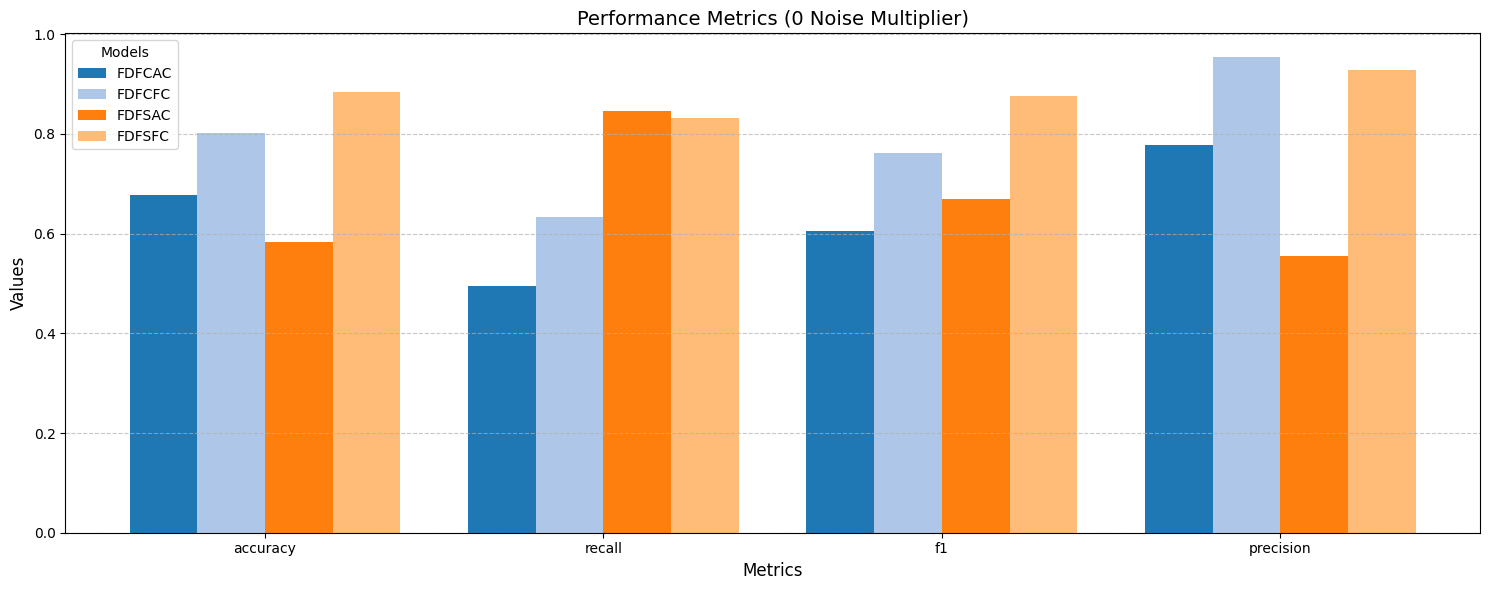

In [70]:
df_FDFCAC_0 = pd.read_csv('./results/FDFCAC/FDFCAC_0_50.csv')
df_FDFCFC_0 = pd.read_csv('./results/FDFCFC/FDFCFC_0_50.csv')
df_FDFSAC_0 = pd.read_csv('./results/FDFSAC/FDFSAC_0_50.csv')
df_FDFSFC_0 = pd.read_csv('./results/FDFSFC/FDFSFC_0_50.csv')
df_FDFCAC_0 = df_FDFCAC_0.dropna(subset=['accuracy'])
df_FDFCFC_0 = df_FDFCFC_0.dropna(subset=['accuracy'])
df_FDFSAC_0 = df_FDFSAC_0.dropna(subset=['accuracy'])
df_FDFSFC_0 = df_FDFSFC_0.dropna(subset=['accuracy'])
df_FDFCAC = df_FDFCAC_0[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFCAC_{col}")
df_FDFCF = df_FDFCFC_0[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFCFC_{col}")
df_FDFSAC = df_FDFSAC_0[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFSAC_{col}")
df_FDFSFC = df_FDFSFC_0[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFSFC_{col}")

# Merge the datasets side-by-side
merged_df = pd.concat([df_FDFCAC, df_FDFCF, df_FDFSAC, df_FDFSFC], axis=1)
import matplotlib.pyplot as plt
import numpy as np

# Assuming merged_df is already defined
last_row = merged_df.iloc[-1]

# Prepare data for visualization
models = ['FDFCAC', 'FDFCFC', 'FDFSAC', 'FDFSFC']
metrics = ['accuracy', 'recall', 'f1', 'precision']
values = []

# Extract metric values for each model
for model in models:
    model_values = [last_row[f"{model}_{metric}"] for metric in metrics]
    values.append(model_values)

# Define the color scheme (customizable)
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']  # Blue and orange shades

# Plot bar charts
x = np.arange(len(metrics))  # x positions for metrics
width = 0.2  # Width of each bar

fig, ax = plt.subplots(figsize=(15, 6))

# Add bars for each model
for i, (model, color) in enumerate(zip(models, colors)):
    ax.bar(x + i * width, values[i], width, label=model, color=color)

# Add labels, title, legend, and grid
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Performance Metrics (0 Noise Multiplier)', fontsize=14)
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend(title="Models", fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


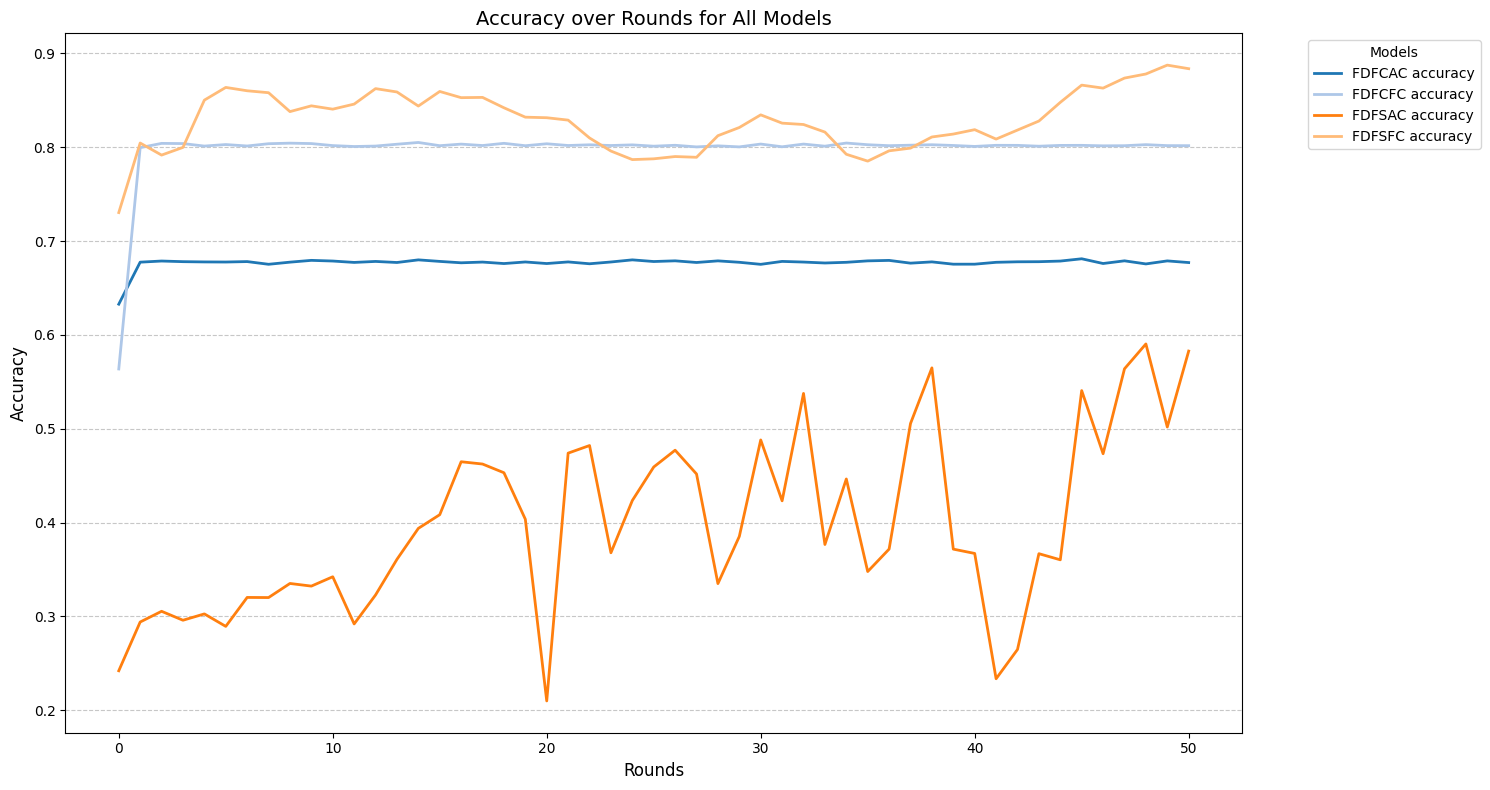

In [72]:
# Prepare data for line chart visualization
rounds = range(len(df_FDFCAC))  # Assuming all datasets have the same number of rows (50 rounds)

# Extract accuracy values for each model
accuracy_data = {model: df[f"{model}_accuracy"].values for model, df in zip(models, [df_FDFCAC, df_FDFCF, df_FDFSAC, df_FDFSFC])}

# Plot line chart for accuracy
fig, ax = plt.subplots(figsize=(15, 8))

# Plot lines for each model's accuracy
for model, color in zip(models, colors):
    ax.plot(rounds, accuracy_data[model], label=f"{model} accuracy", color=color, linewidth=2)

# Add labels, title, legend, and grid
ax.set_xlabel('Rounds', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy over Rounds for All Models', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Models", fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


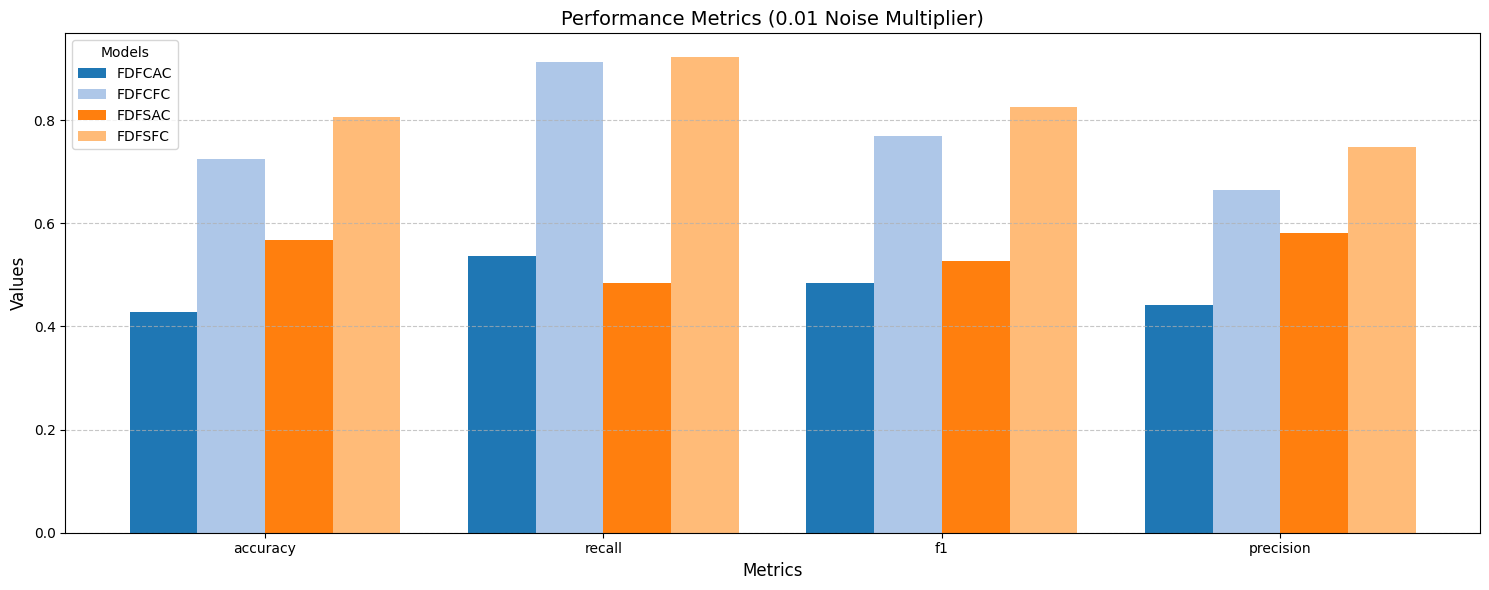

In [73]:
df_FDFCAC_0_01 = pd.read_csv('./results/FDFCAC/FDFCAC_0.01_50.csv')
df_FDFCFC_0_01 = pd.read_csv('./results/FDFCFC/FDFCFC_0.01_50.csv')
df_FDFSAC_0_01 = pd.read_csv('./results/FDFSAC/FDFSAC_0.01_50.csv')
df_FDFSFC_0_01 = pd.read_csv('./results/FDFSFC/FDFSFC_0.01_50.csv')
df_FDFCAC_0_01 = df_FDFCAC_0_01.dropna(subset=['accuracy'])
df_FDFCFC_0_01 = df_FDFCFC_0_01.dropna(subset=['accuracy'])
df_FDFSAC_0_01 = df_FDFSAC_0_01.dropna(subset=['accuracy'])
df_FDFSFC_0_01 = df_FDFSFC_0_01.dropna(subset=['accuracy'])
df_FDFCAC = df_FDFCAC_0_01[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFCAC_{col}")
df_FDFCF = df_FDFCFC_0_01[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFCFC_{col}")
df_FDFSAC = df_FDFSAC_0_01[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFSAC_{col}")
df_FDFSFC = df_FDFSFC_0_01[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFSFC_{col}")

# Merge the datasets side-by-side
merged_df = pd.concat([df_FDFCAC, df_FDFCF, df_FDFSAC, df_FDFSFC], axis=1)

# Plot for 0.01 Noise Multiplier
last_row = merged_df.iloc[-1]
values = []
for model in models:
    model_values = [last_row[f"{model}_{metric}"] for metric in metrics]
    values.append(model_values)

fig, ax = plt.subplots(figsize=(15, 6))
for i, (model, color) in enumerate(zip(models, colors)):
    ax.bar(x + i * width, values[i], width, label=model, color=color)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Performance Metrics (0.01 Noise Multiplier)', fontsize=14)
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend(title="Models", fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


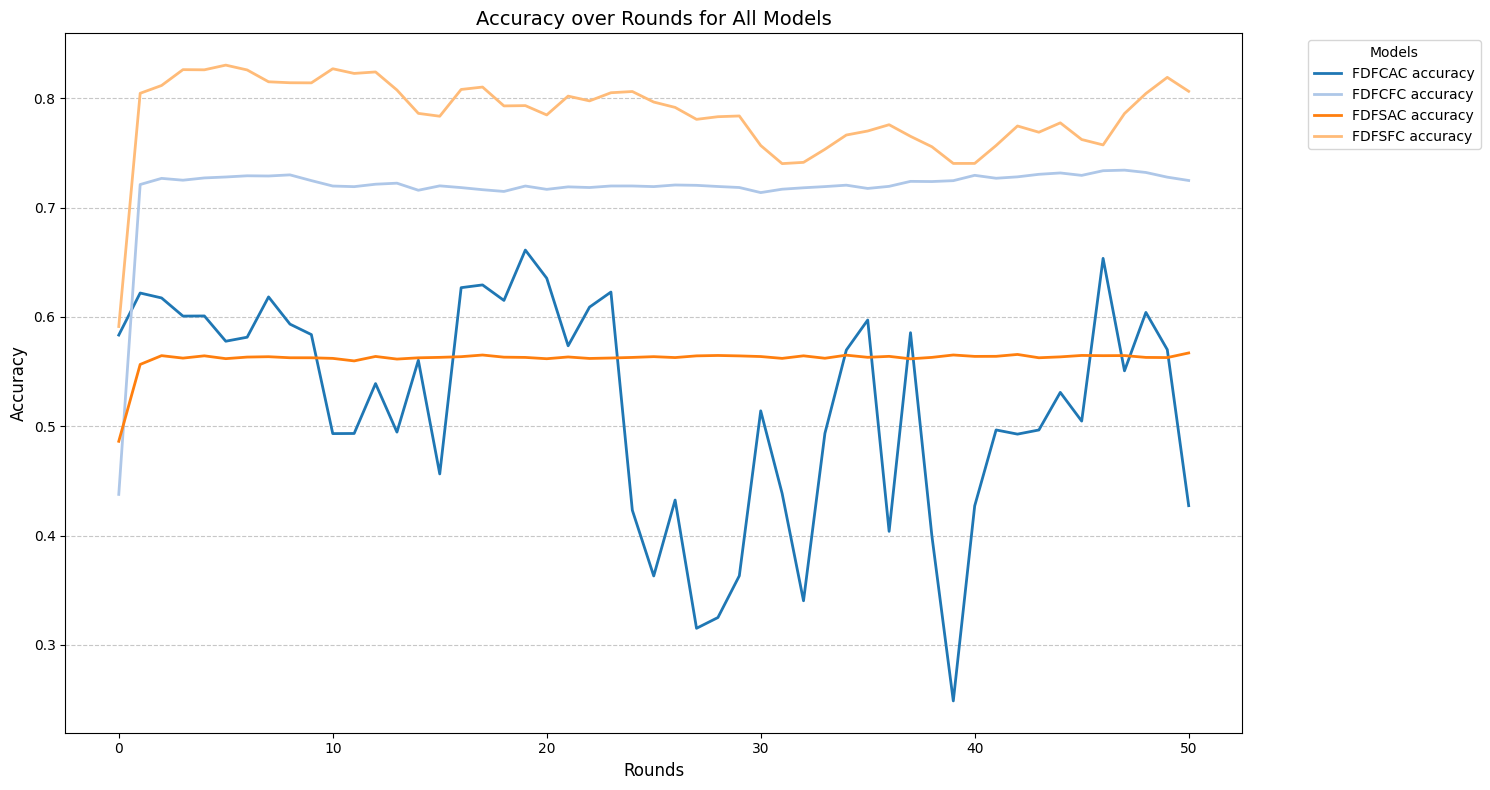

In [74]:
# Prepare data for line chart visualization
rounds = range(len(df_FDFCAC))  # Assuming all datasets have the same number of rows (50 rounds)

# Extract accuracy values for each model
accuracy_data = {model: df[f"{model}_accuracy"].values for model, df in zip(models, [df_FDFCAC, df_FDFCF, df_FDFSAC, df_FDFSFC])}

# Plot line chart for accuracy
fig, ax = plt.subplots(figsize=(15, 8))

# Plot lines for each model's accuracy
for model, color in zip(models, colors):
    ax.plot(rounds, accuracy_data[model], label=f"{model} accuracy", color=color, linewidth=2)

# Add labels, title, legend, and grid
ax.set_xlabel('Rounds', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy over Rounds for All Models', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Models", fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


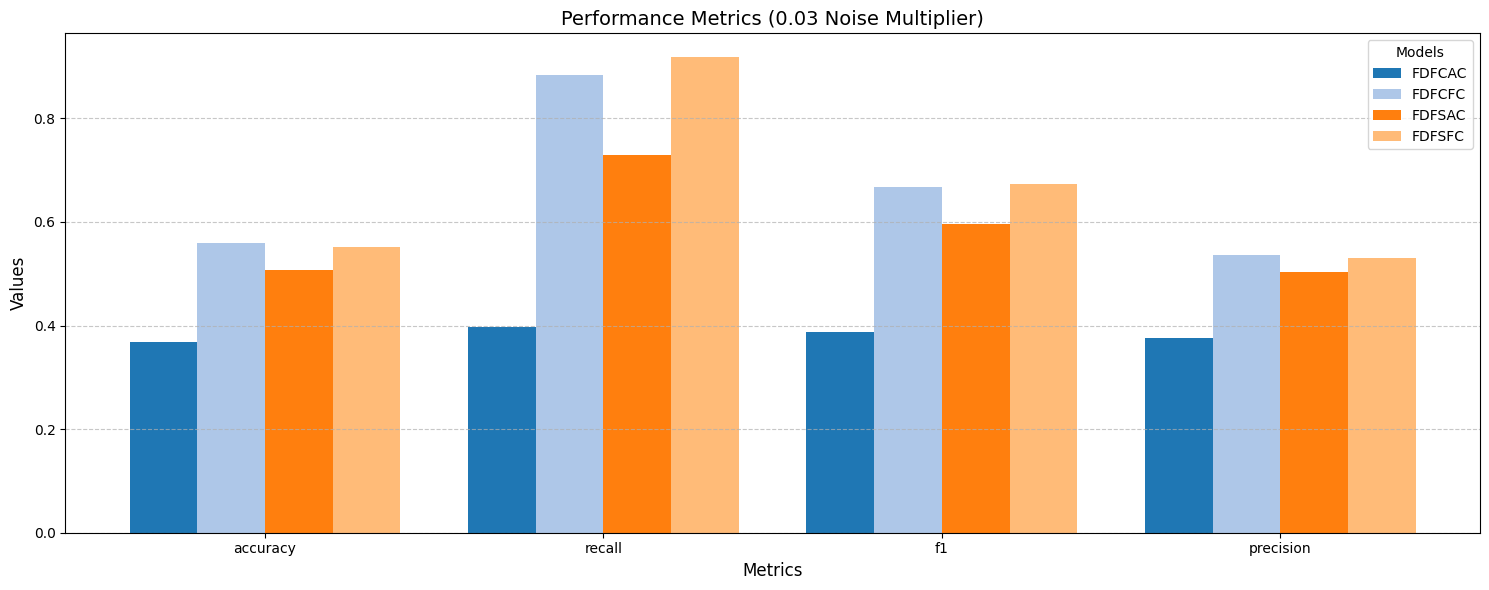

In [75]:
df_FDFCAC_0_03 = pd.read_csv('./results/FDFCAC/FDFCAC_0.03_50.csv')
df_FDFCFC_0_03 = pd.read_csv('./results/FDFCFC/FDFCFC_0.03_50.csv')
df_FDFSAC_0_03 = pd.read_csv('./results/FDFSAC/FDFSAC_0.03_50.csv')
df_FDFSFC_0_03 = pd.read_csv('./results/FDFSFC/FDFSFC_0.03_50.csv')
df_FDFCAC_0_03 = df_FDFCAC_0_03.dropna(subset=['accuracy'])
df_FDFCFC_0_03 = df_FDFCFC_0_03.dropna(subset=['accuracy'])
df_FDFSAC_0_03 = df_FDFSAC_0_03.dropna(subset=['accuracy'])
df_FDFSFC_0_03 = df_FDFSFC_0_03.dropna(subset=['accuracy'])
df_FDFCAC = df_FDFCAC_0_03[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFCAC_{col}")
df_FDFCF = df_FDFCFC_0_03[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFCFC_{col}")
df_FDFSAC = df_FDFSAC_0_03[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFSAC_{col}")
df_FDFSFC = df_FDFSFC_0_03[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFSFC_{col}")

# Merge the datasets side-by-side
merged_df = pd.concat([df_FDFCAC, df_FDFCF, df_FDFSAC, df_FDFSFC], axis=1)

# Plot for 0.03 Noise Multiplier
last_row = merged_df.iloc[-1]
values = []
for model in models:
    model_values = [last_row[f"{model}_{metric}"] for metric in metrics]
    values.append(model_values)

fig, ax = plt.subplots(figsize=(15, 6))
for i, (model, color) in enumerate(zip(models, colors)):
    ax.bar(x + i * width, values[i], width, label=model, color=color)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Performance Metrics (0.03 Noise Multiplier)', fontsize=14)
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend(title="Models", fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


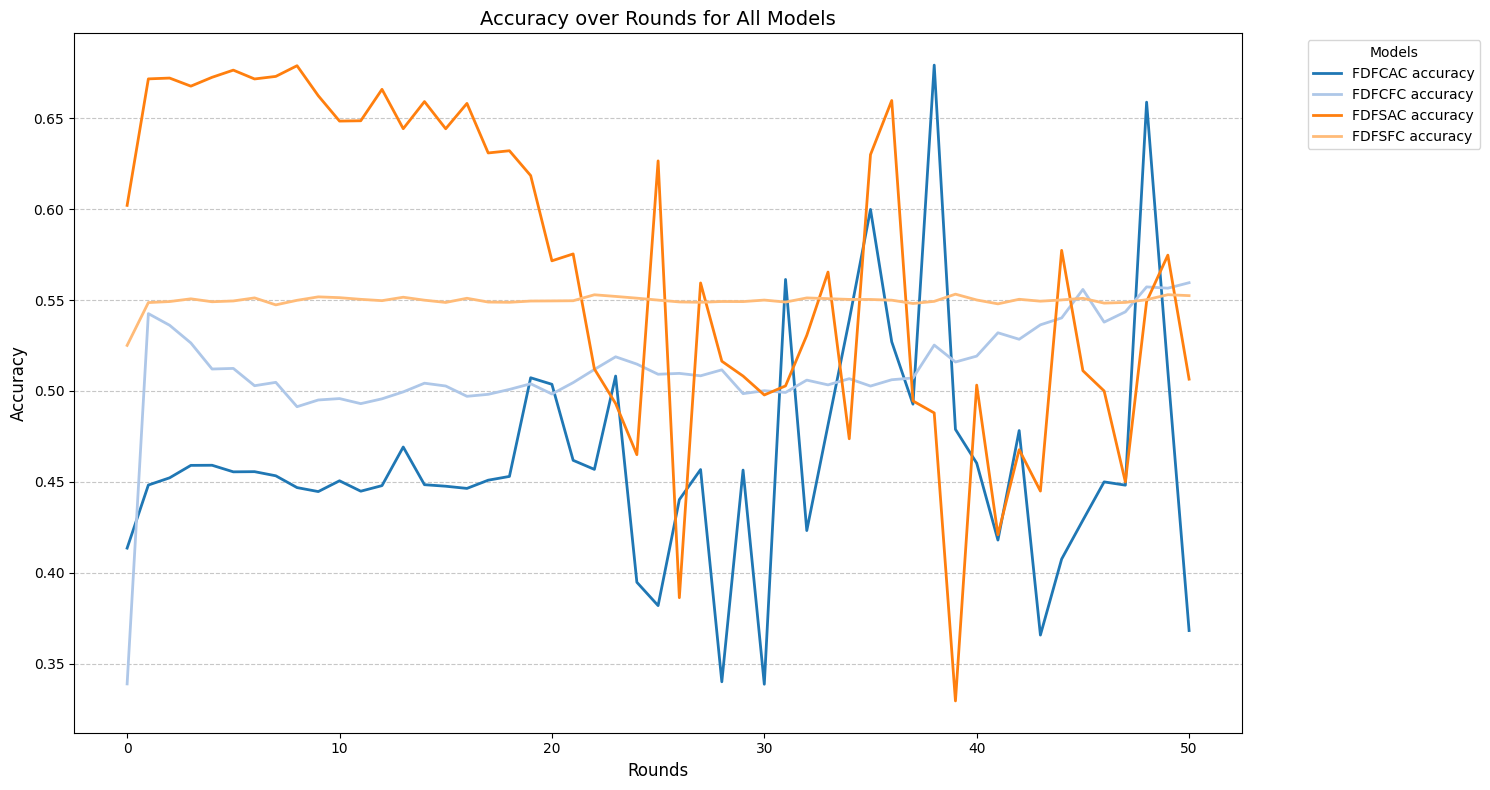

In [76]:
# Prepare data for line chart visualization
rounds = range(len(df_FDFCAC))  # Assuming all datasets have the same number of rows (50 rounds)

# Extract accuracy values for each model
accuracy_data = {model: df[f"{model}_accuracy"].values for model, df in zip(models, [df_FDFCAC, df_FDFCF, df_FDFSAC, df_FDFSFC])}

# Plot line chart for accuracy
fig, ax = plt.subplots(figsize=(15, 8))

# Plot lines for each model's accuracy
for model, color in zip(models, colors):
    ax.plot(rounds, accuracy_data[model], label=f"{model} accuracy", color=color, linewidth=2)

# Add labels, title, legend, and grid
ax.set_xlabel('Rounds', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy over Rounds for All Models', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Models", fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


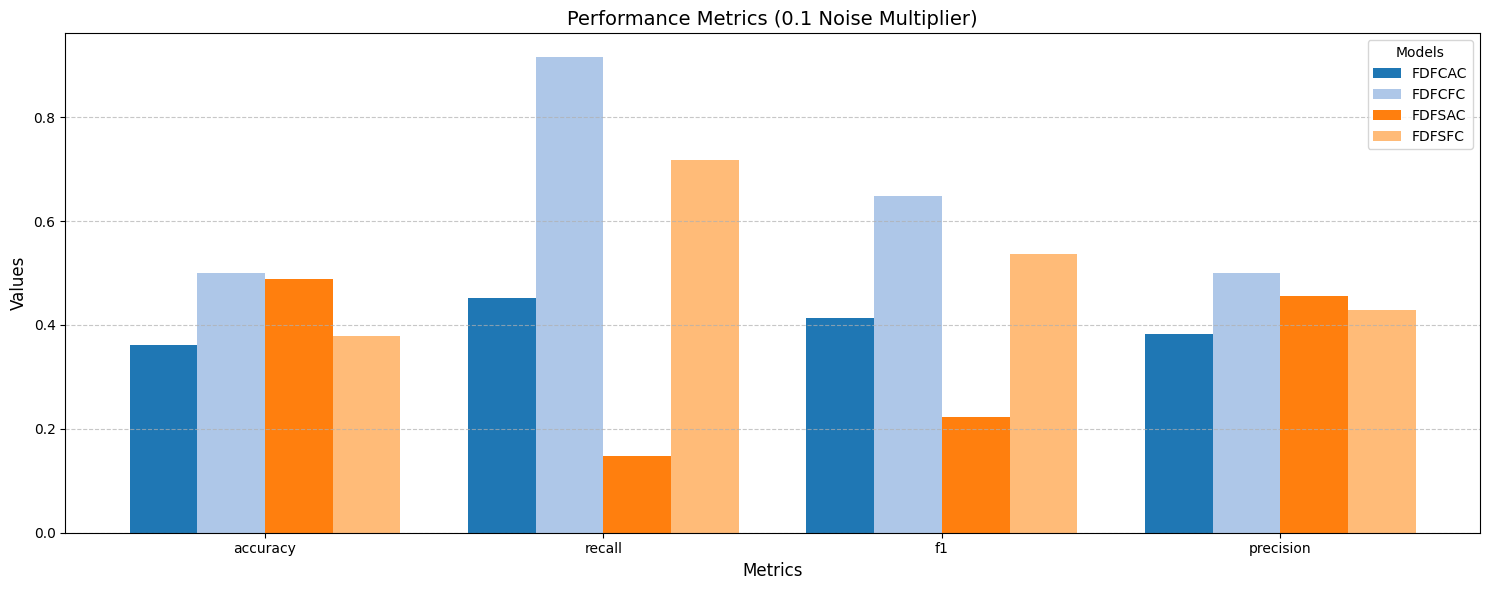

In [77]:
df_FDFCAC_0_1 = pd.read_csv('./results/FDFCAC/FDFCAC_0.1_50.csv')
df_FDFCFC_0_1 = pd.read_csv('./results/FDFCFC/FDFCFC_0.1_50.csv')
df_FDFSAC_0_1 = pd.read_csv('./results/FDFSAC/FDFSAC_0.1_50.csv')
df_FDFSFC_0_1 = pd.read_csv('./results/FDFSFC/FDFSFC_0.1_50.csv')
df_FDFCAC_0_1 = df_FDFCAC_0_1.dropna(subset=['accuracy'])
df_FDFCFC_0_1 = df_FDFCFC_0_1.dropna(subset=['accuracy'])
df_FDFSAC_0_1 = df_FDFSAC_0_1.dropna(subset=['accuracy'])
df_FDFSFC_0_1 = df_FDFSFC_0_1.dropna(subset=['accuracy'])
df_FDFCAC = df_FDFCAC_0_1[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFCAC_{col}")
df_FDFCF = df_FDFCFC_0_1[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFCFC_{col}")
df_FDFSAC = df_FDFSAC_0_1[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFSAC_{col}")
df_FDFSFC = df_FDFSFC_0_1[['accuracy', 'recall', 'f1', 'precision']].rename(
    columns=lambda col: f"FDFSFC_{col}")

# Merge the datasets side-by-side
merged_df = pd.concat([df_FDFCAC, df_FDFCF, df_FDFSAC, df_FDFSFC], axis=1)

# Plot for 0.1 Noise Multiplier
last_row = merged_df.iloc[-1]
values = []
for model in models:
    model_values = [last_row[f"{model}_{metric}"] for metric in metrics]
    values.append(model_values)

fig, ax = plt.subplots(figsize=(15, 6))
for i, (model, color) in enumerate(zip(models, colors)):
    ax.bar(x + i * width, values[i], width, label=model, color=color)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Performance Metrics (0.1 Noise Multiplier)', fontsize=14)
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend(title="Models", fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


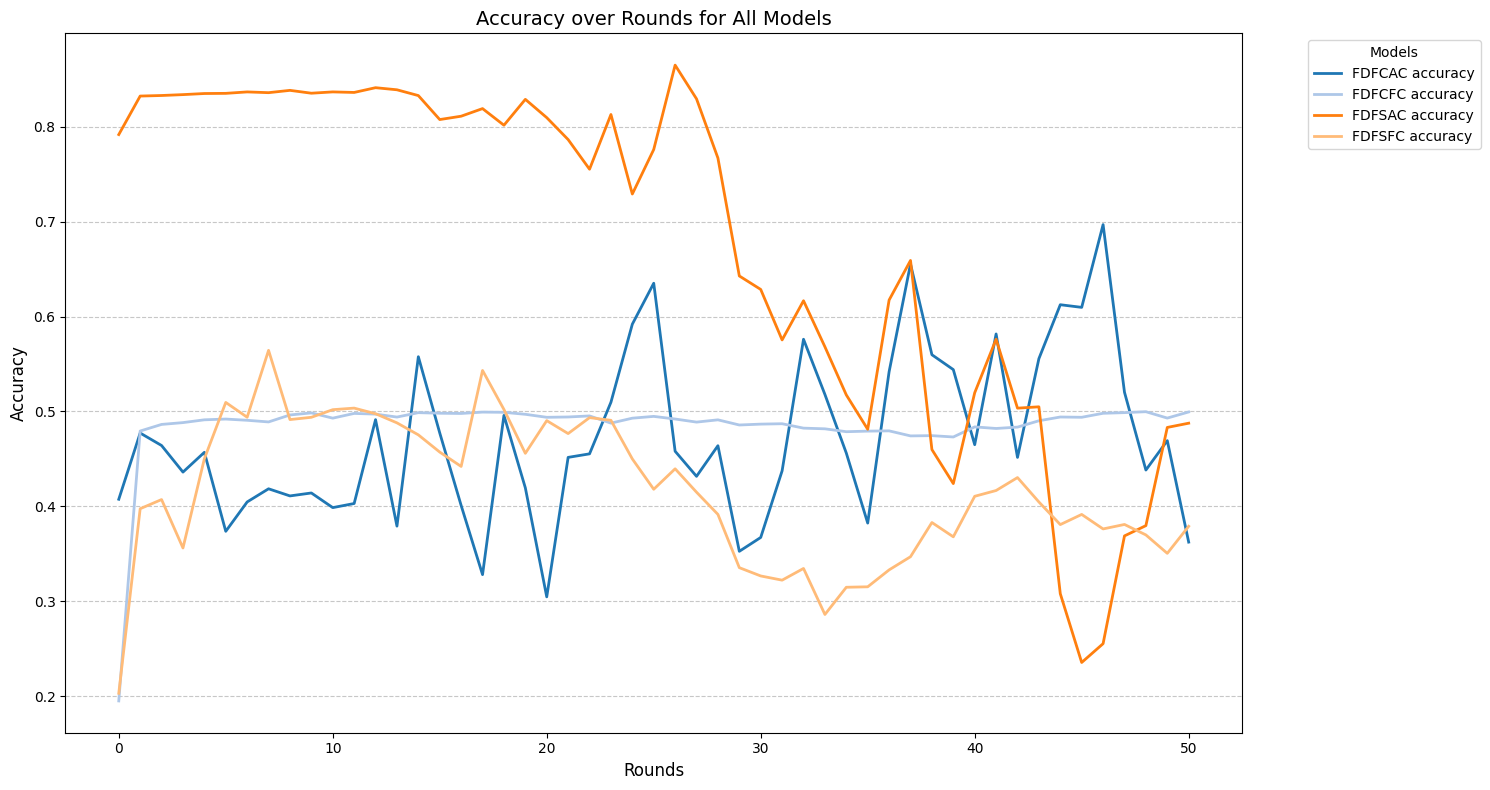

In [78]:
# Prepare data for line chart visualization
rounds = range(len(df_FDFCAC))  # Assuming all datasets have the same number of rows (50 rounds)

# Extract accuracy values for each model
accuracy_data = {model: df[f"{model}_accuracy"].values for model, df in zip(models, [df_FDFCAC, df_FDFCF, df_FDFSAC, df_FDFSFC])}

# Plot line chart for accuracy
fig, ax = plt.subplots(figsize=(15, 8))

# Plot lines for each model's accuracy
for model, color in zip(models, colors):
    ax.plot(rounds, accuracy_data[model], label=f"{model} accuracy", color=color, linewidth=2)

# Add labels, title, legend, and grid
ax.set_xlabel('Rounds', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy over Rounds for All Models', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title="Models", fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


# Privacy Metrics

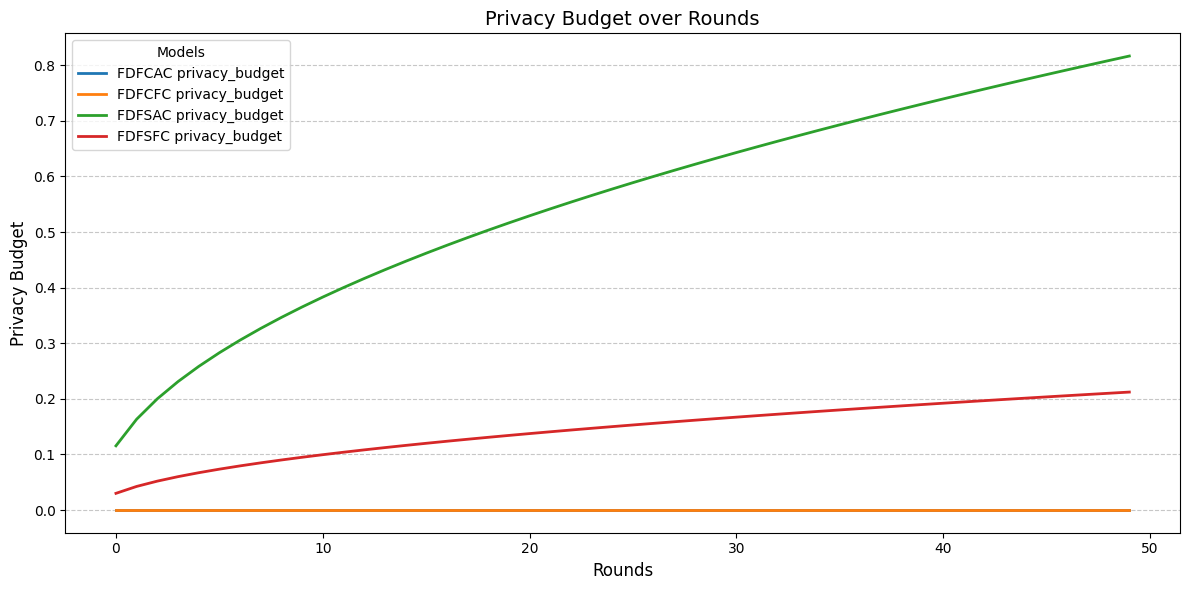

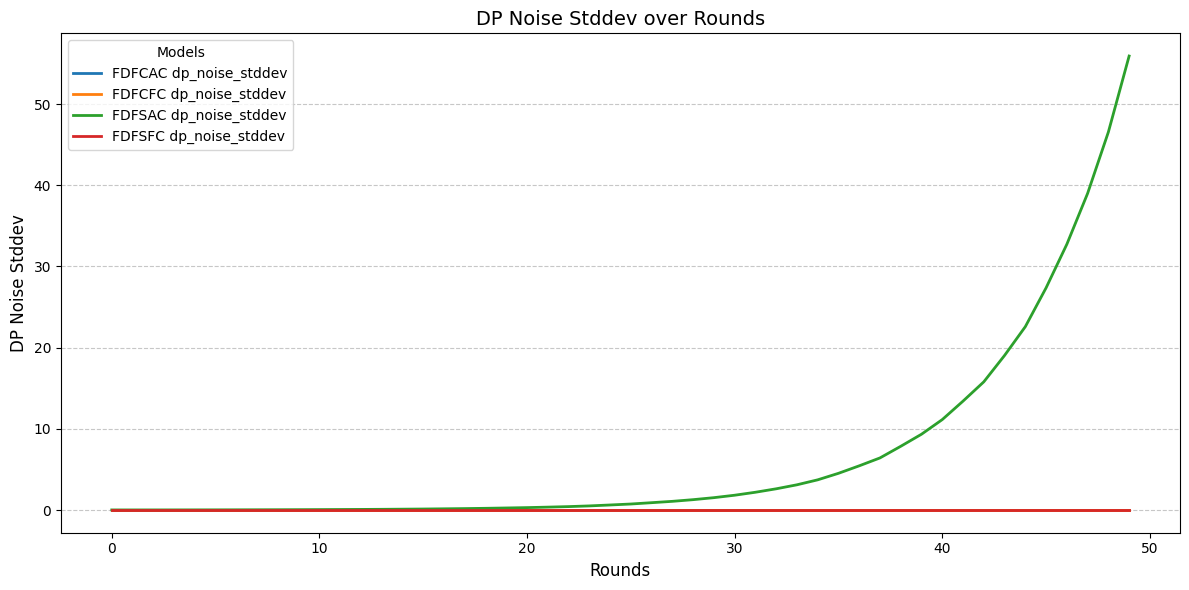

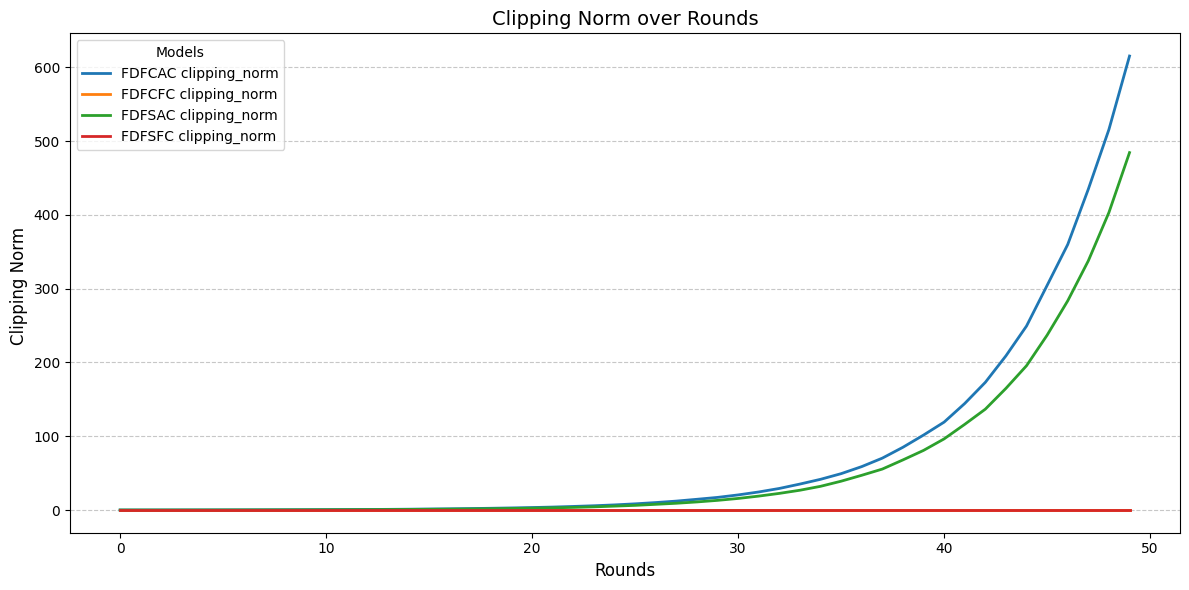

In [85]:
df_FDFCAC_0 = pd.read_csv('./results/FDFCAC/FDFCAC_0_50.csv')
df_FDFCFC_0 = pd.read_csv('./results/FDFCFC/FDFCFC_0_50.csv')
df_FDFSAC_0 = pd.read_csv('./results/FDFSAC/FDFSAC_0_50.csv')
df_FDFSFC_0 = pd.read_csv('./results/FDFSFC/FDFSFC_0_50.csv')
df_FDFCAC_0 = df_FDFCAC_0.dropna(subset=['nsr'])
df_FDFCFC_0 = df_FDFCFC_0.dropna(subset=['nsr'])
df_FDFSAC_0 = df_FDFSAC_0.dropna(subset=['nsr'])
df_FDFSFC_0 = df_FDFSFC_0.dropna(subset=['nsr'])
# Retain only relevant columns
df_FDFCAC = df_FDFCAC_0[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(
    columns=lambda col: f"FDFCAC_{col}")
df_FDFCFC = df_FDFCFC_0[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(
    columns=lambda col: f"FDFCFC_{col}")
df_FDFSAC = df_FDFSAC_0[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(
    columns=lambda col: f"FDFSAC_{col}")
df_FDFSFC = df_FDFSFC_0[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(
    columns=lambda col: f"FDFSFC_{col}")

# Merge the datasets side-by-side
merged_df = pd.concat([df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC], axis=1)

# Line charts for privacy_budget and dp_noise_stddev
privacy_budget_values = {model: df[f"{model}_privacy_budget"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}
dp_noise_stddev_values = {model: df[f"{model}_dp_noise_stddev"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}
dp_noise_clipping_norm_values = {model: df[f"{model}_clipping_norm"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}

# Plot line chart for privacy_budget
fig, ax1 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax1.plot(range(len(privacy_budget_values[model])), privacy_budget_values[model], label=f"{model} privacy_budget", color=color, linewidth=2)
ax1.set_title("Privacy Budget over Rounds", fontsize=14)
ax1.set_xlabel("Rounds", fontsize=12)
ax1.set_ylabel("Privacy Budget", fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()

# Plot line chart for dp_noise_stddev
fig, ax2 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax2.plot(range(len(dp_noise_stddev_values[model])), dp_noise_stddev_values[model], label=f"{model} dp_noise_stddev", color=color, linewidth=2)
ax2.set_title("DP Noise Stddev over Rounds", fontsize=14)
ax2.set_xlabel("Rounds", fontsize=12)
ax2.set_ylabel("DP Noise Stddev", fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()

fig, ax3 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax3.plot(range(len(dp_noise_clipping_norm_values[model])), dp_noise_clipping_norm_values[model], label=f"{model} clipping_norm", color=color, linewidth=2)
ax3.set_title("Clipping Norm over Rounds", fontsize=14)
ax3.set_xlabel("Rounds", fontsize=12)
ax3.set_ylabel("Clipping Norm ", fontsize=12)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()




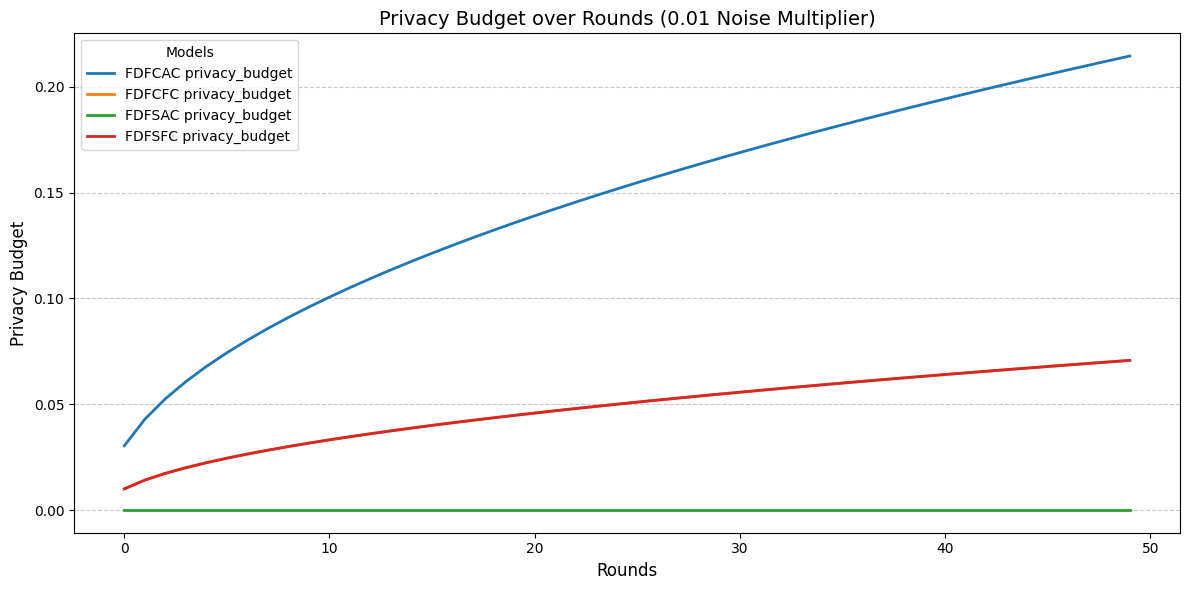

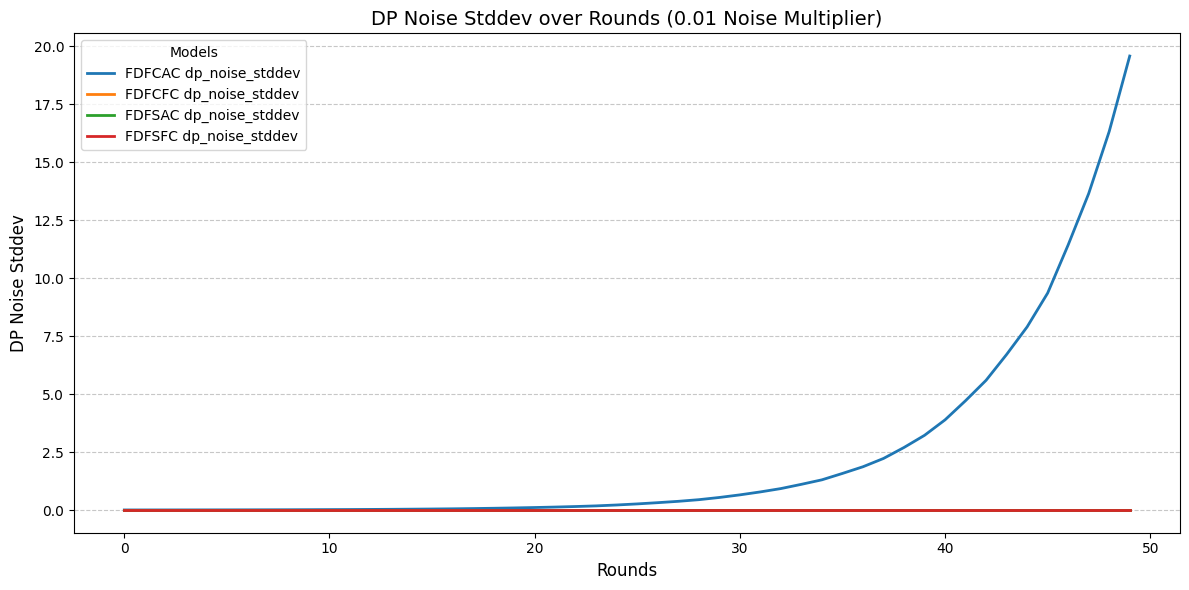

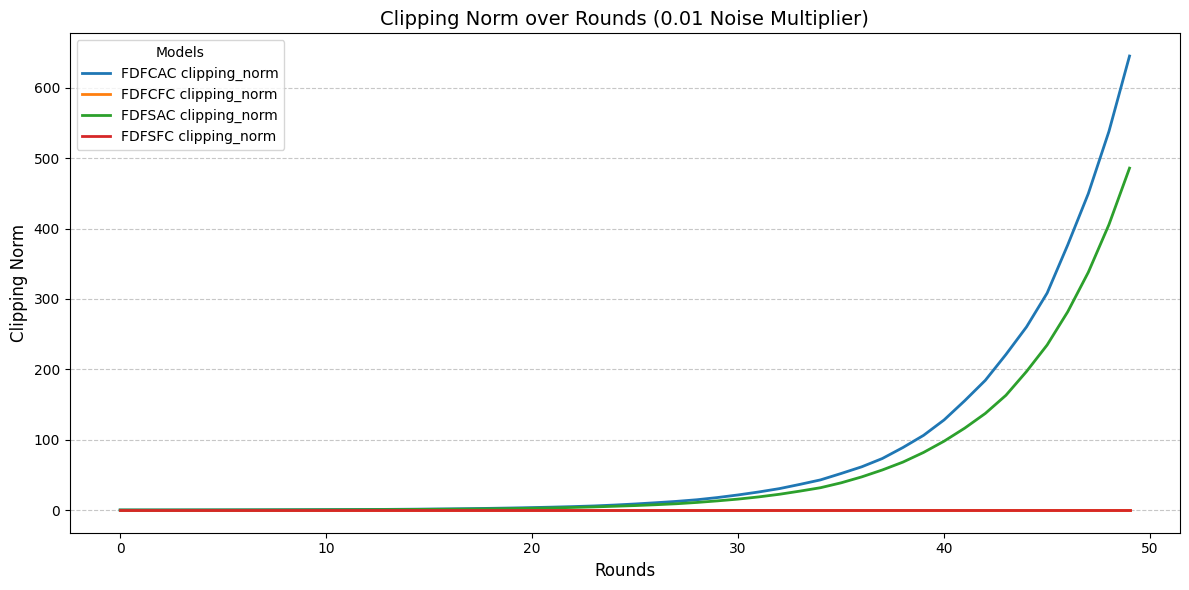

In [86]:
# Load datasets for 0.01 noise multiplier
df_FDFCAC_0_01 = pd.read_csv('./results/FDFCAC/FDFCAC_0.01_50.csv')
df_FDFCFC_0_01 = pd.read_csv('./results/FDFCFC/FDFCFC_0.01_50.csv')
df_FDFSAC_0_01 = pd.read_csv('./results/FDFSAC/FDFSAC_0.01_50.csv')
df_FDFSFC_0_01 = pd.read_csv('./results/FDFSFC/FDFSFC_0.01_50.csv')
df_FDFCAC_0_01 = df_FDFCAC_0_01.dropna(subset=['nsr'])
df_FDFCFC_0_01 = df_FDFCFC_0_01.dropna(subset=['nsr'])
df_FDFSAC_0_01 = df_FDFSAC_0_01.dropna(subset=['nsr'])
df_FDFSFC_0_01 = df_FDFSFC_0_01.dropna(subset=['nsr'])

# Retain only relevant columns
df_FDFCAC = df_FDFCAC_0_01[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFCAC_{col}")
df_FDFCFC = df_FDFCFC_0_01[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFCFC_{col}")
df_FDFSAC = df_FDFSAC_0_01[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFSAC_{col}")
df_FDFSFC = df_FDFSFC_0_01[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFSFC_{col}")

# Merge the datasets
merged_df = pd.concat([df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC], axis=1)

# Extract values for visualization
privacy_budget_values = {model: df[f"{model}_privacy_budget"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}
dp_noise_stddev_values = {model: df[f"{model}_dp_noise_stddev"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}
clipping_norm_values = {model: df[f"{model}_clipping_norm"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}

# Line chart for privacy_budget
fig, ax1 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax1.plot(range(len(privacy_budget_values[model])), privacy_budget_values[model], label=f"{model} privacy_budget", color=color, linewidth=2)
ax1.set_title("Privacy Budget over Rounds (0.01 Noise Multiplier)", fontsize=14)
ax1.set_xlabel("Rounds", fontsize=12)
ax1.set_ylabel("Privacy Budget", fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()

# Line chart for dp_noise_stddev
fig, ax2 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax2.plot(range(len(dp_noise_stddev_values[model])), dp_noise_stddev_values[model], label=f"{model} dp_noise_stddev", color=color, linewidth=2)
ax2.set_title("DP Noise Stddev over Rounds (0.01 Noise Multiplier)", fontsize=14)
ax2.set_xlabel("Rounds", fontsize=12)
ax2.set_ylabel("DP Noise Stddev", fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()

# Line chart for clipping_norm
fig, ax3 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax3.plot(range(len(clipping_norm_values[model])), clipping_norm_values[model], label=f"{model} clipping_norm", color=color, linewidth=2)
ax3.set_title("Clipping Norm over Rounds (0.01 Noise Multiplier)", fontsize=14)
ax3.set_xlabel("Rounds", fontsize=12)
ax3.set_ylabel("Clipping Norm", fontsize=12)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()


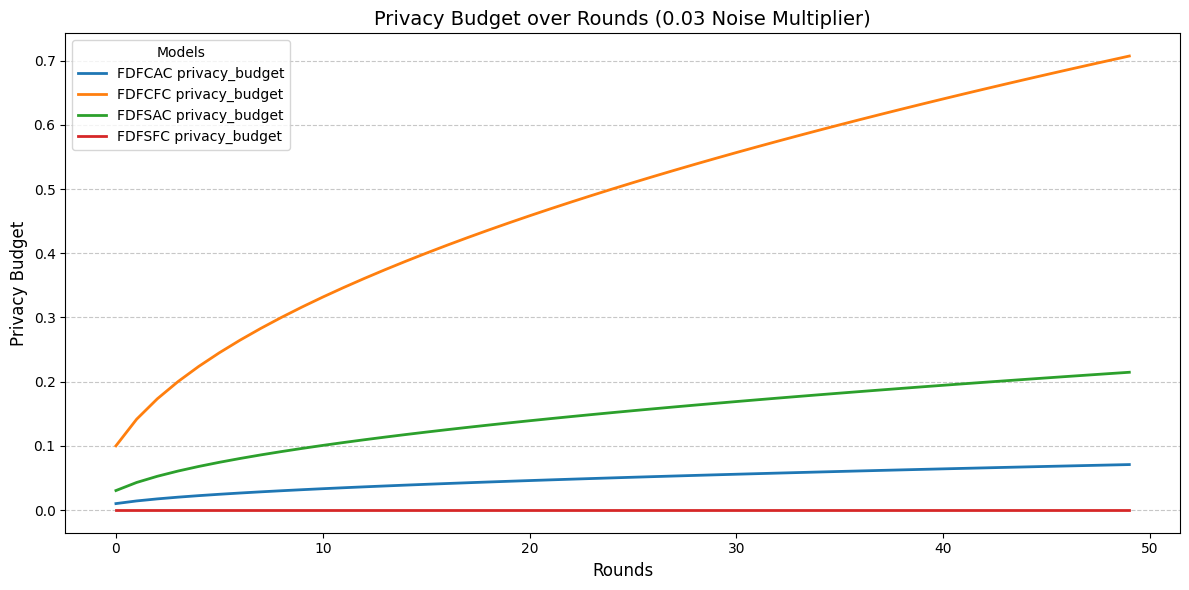

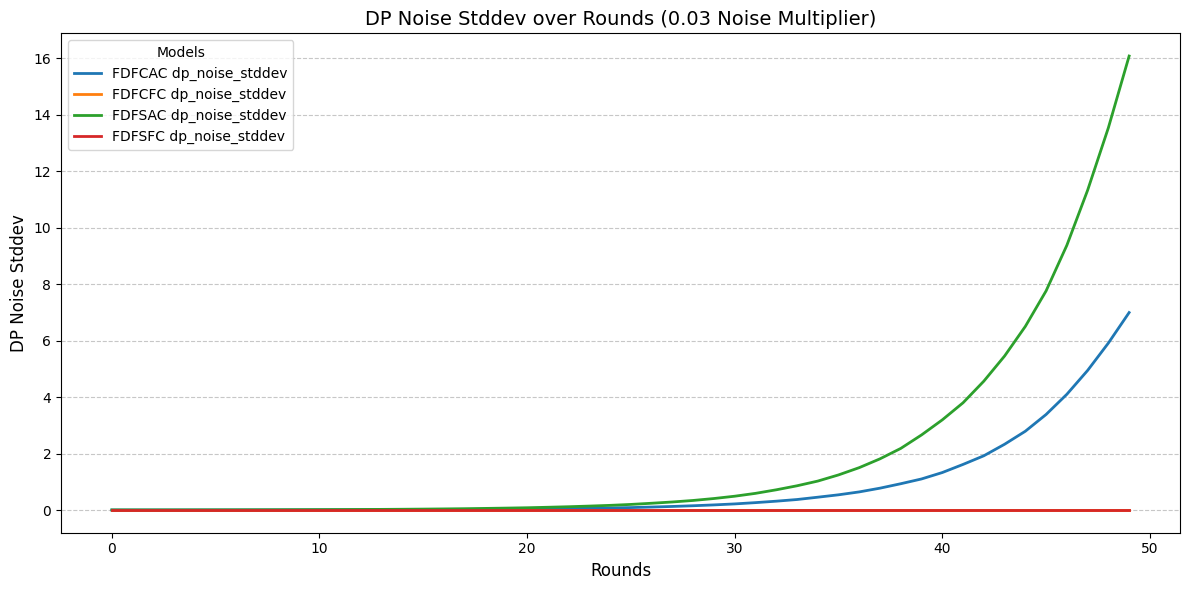

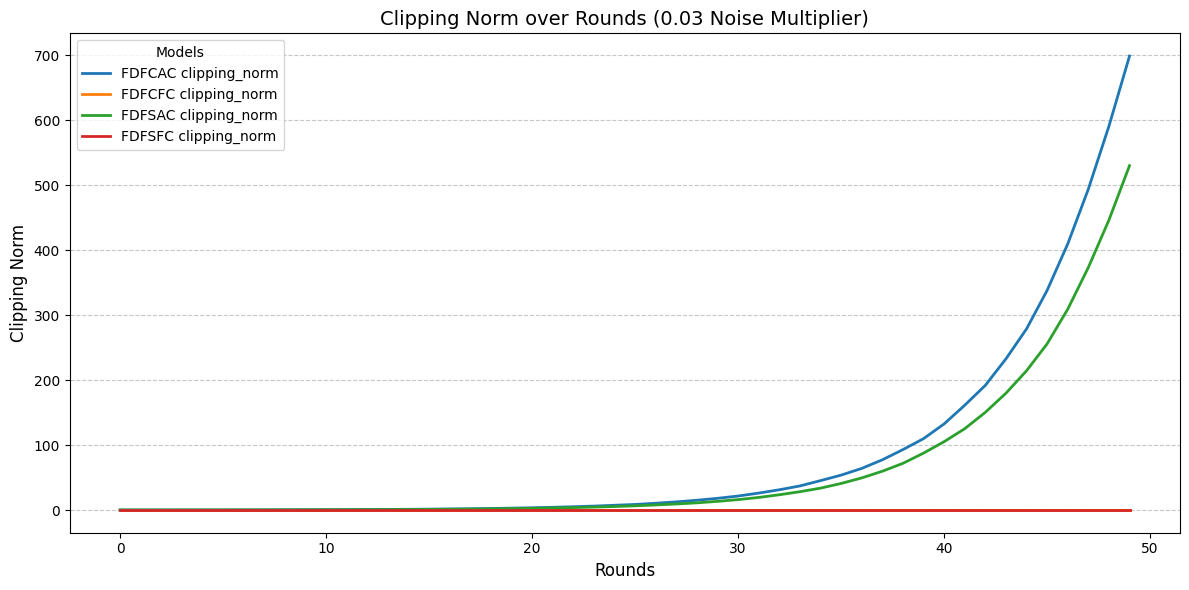

In [87]:
# Load datasets for 0.03 noise multiplier
df_FDFCAC_0_03 = pd.read_csv('./results/FDFCAC/FDFCAC_0.03_50.csv')
df_FDFCFC_0_03 = pd.read_csv('./results/FDFCFC/FDFCFC_0.03_50.csv')
df_FDFSAC_0_03 = pd.read_csv('./results/FDFSAC/FDFSAC_0.03_50.csv')
df_FDFSFC_0_03 = pd.read_csv('./results/FDFSFC/FDFSFC_0.03_50.csv')

df_FDFCAC_0_03 = df_FDFCAC_0_03.dropna(subset=['nsr'])
df_FDFCFC_0_03 = df_FDFCFC_0_03.dropna(subset=['nsr'])
df_FDFSAC_0_03 = df_FDFSAC_0_03.dropna(subset=['nsr'])
df_FDFSFC_0_03 = df_FDFSFC_0_03.dropna(subset=['nsr'])

# Retain only relevant columns
df_FDFCAC = df_FDFCAC_0_03[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFCAC_{col}")
df_FDFCFC = df_FDFCFC_0_03[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFCFC_{col}")
df_FDFSAC = df_FDFSAC_0_03[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFSAC_{col}")
df_FDFSFC = df_FDFSFC_0_03[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFSFC_{col}")

# Merge the datasets
merged_df = pd.concat([df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC], axis=1)

# Extract values for visualization
privacy_budget_values = {model: df[f"{model}_privacy_budget"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}
dp_noise_stddev_values = {model: df[f"{model}_dp_noise_stddev"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}
clipping_norm_values = {model: df[f"{model}_clipping_norm"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}

# Plot line chart for privacy_budget
fig, ax1 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax1.plot(range(len(privacy_budget_values[model])), privacy_budget_values[model], label=f"{model} privacy_budget", color=color, linewidth=2)
ax1.set_title("Privacy Budget over Rounds (0.03 Noise Multiplier)", fontsize=14)
ax1.set_xlabel("Rounds", fontsize=12)
ax1.set_ylabel("Privacy Budget", fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()

# Plot line chart for dp_noise_stddev
fig, ax2 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax2.plot(range(len(dp_noise_stddev_values[model])), dp_noise_stddev_values[model], label=f"{model} dp_noise_stddev", color=color, linewidth=2)
ax2.set_title("DP Noise Stddev over Rounds (0.03 Noise Multiplier)", fontsize=14)
ax2.set_xlabel("Rounds", fontsize=12)
ax2.set_ylabel("DP Noise Stddev", fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()

# Plot line chart for clipping_norm
fig, ax3 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax3.plot(range(len(clipping_norm_values[model])), clipping_norm_values[model], label=f"{model} clipping_norm", color=color, linewidth=2)
ax3.set_title("Clipping Norm over Rounds (0.03 Noise Multiplier)", fontsize=14)
ax3.set_xlabel("Rounds", fontsize=12)
ax3.set_ylabel("Clipping Norm", fontsize=12)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()


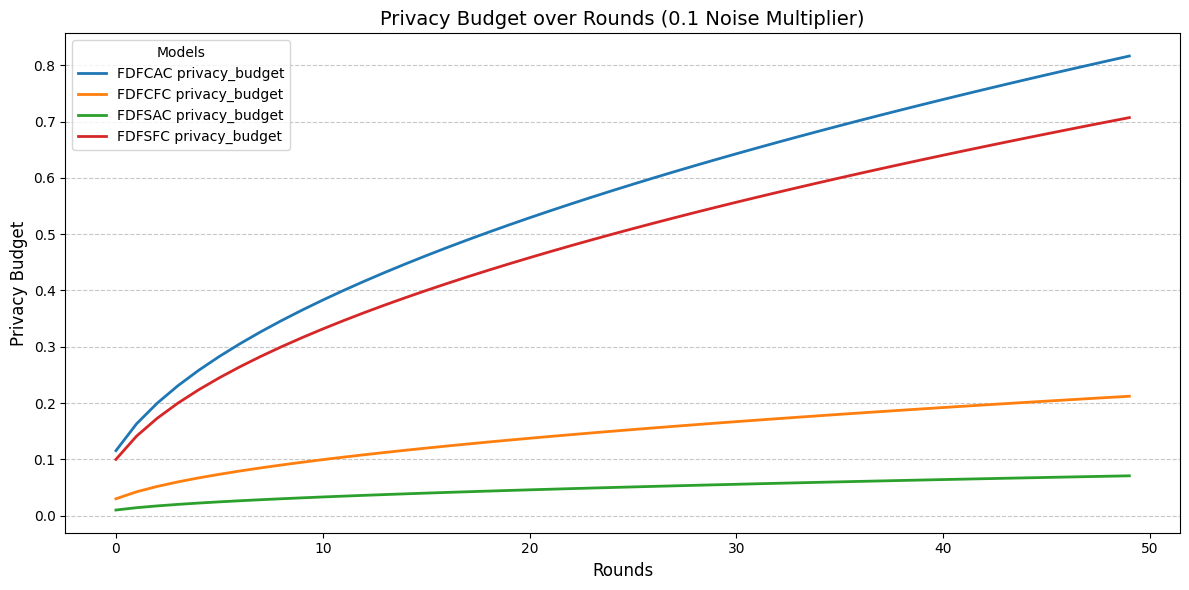

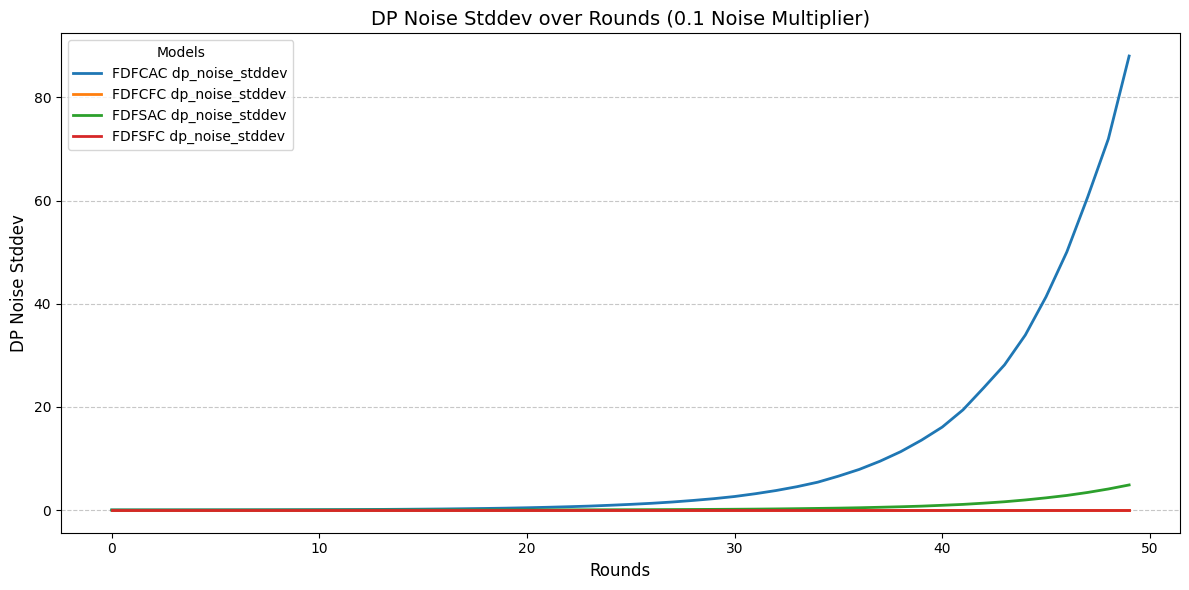

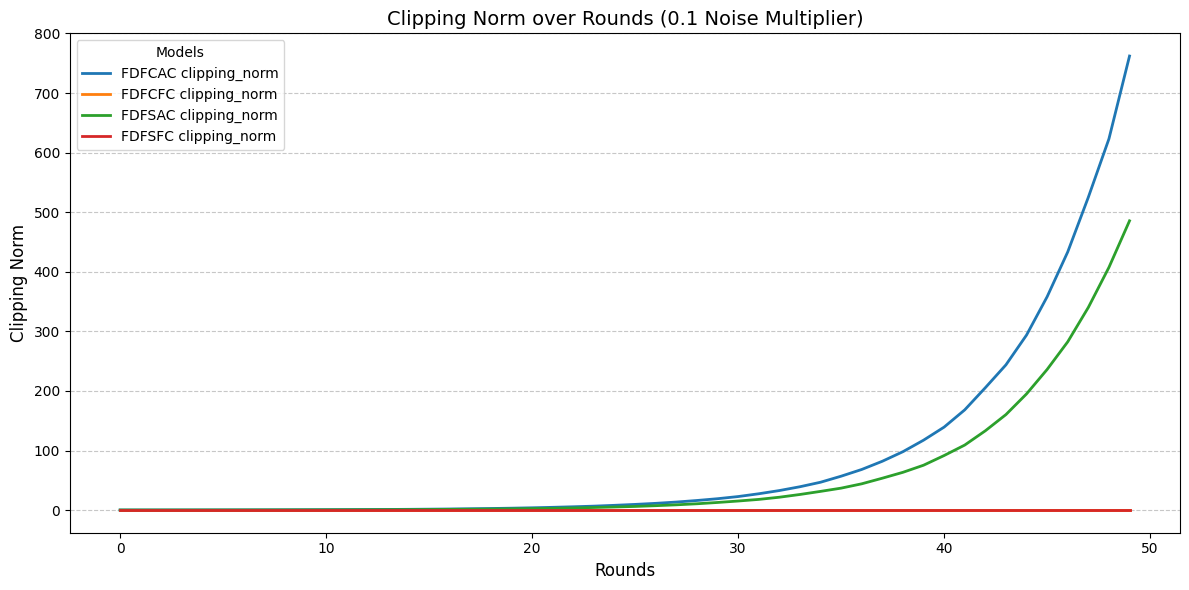

In [88]:
# Load datasets for 0.1 noise multiplier
df_FDFCAC_0_1 = pd.read_csv('./results/FDFCAC/FDFCAC_0.1_50.csv')
df_FDFCFC_0_1 = pd.read_csv('./results/FDFCFC/FDFCFC_0.1_50.csv')
df_FDFSAC_0_1 = pd.read_csv('./results/FDFSAC/FDFSAC_0.1_50.csv')
df_FDFSFC_0_1 = pd.read_csv('./results/FDFSFC/FDFSFC_0.1_50.csv')

df_FDFCAC_0_1 = df_FDFCAC_0_1.dropna(subset=['nsr'])
df_FDFCFC_0_1 = df_FDFCFC_0_1.dropna(subset=['nsr'])
df_FDFSAC_0_1 = df_FDFSAC_0_1.dropna(subset=['nsr'])
df_FDFSFC_0_1 = df_FDFSFC_0_1.dropna(subset=['nsr'])

# Retain only relevant columns
df_FDFCAC = df_FDFCAC_0_1[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFCAC_{col}")
df_FDFCFC = df_FDFCFC_0_1[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFCFC_{col}")
df_FDFSAC = df_FDFSAC_0_1[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFSAC_{col}")
df_FDFSFC = df_FDFSFC_0_1[['privacy_budget', 'clipping_norm', 'dp_noise_stddev']].rename(columns=lambda col: f"FDFSFC_{col}")

# Merge the datasets
merged_df = pd.concat([df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC], axis=1)

# Extract values for visualization
privacy_budget_values = {model: df[f"{model}_privacy_budget"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}
dp_noise_stddev_values = {model: df[f"{model}_dp_noise_stddev"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}
clipping_norm_values = {model: df[f"{model}_clipping_norm"].values for model, df in zip(models, [df_FDFCAC, df_FDFCFC, df_FDFSAC, df_FDFSFC])}

# Plot line chart for privacy_budget
fig, ax1 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax1.plot(range(len(privacy_budget_values[model])), privacy_budget_values[model], label=f"{model} privacy_budget", color=color, linewidth=2)
ax1.set_title("Privacy Budget over Rounds (0.1 Noise Multiplier)", fontsize=14)
ax1.set_xlabel("Rounds", fontsize=12)
ax1.set_ylabel("Privacy Budget", fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()

# Plot line chart for dp_noise_stddev
fig, ax2 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax2.plot(range(len(dp_noise_stddev_values[model])), dp_noise_stddev_values[model], label=f"{model} dp_noise_stddev", color=color, linewidth=2)
ax2.set_title("DP Noise Stddev over Rounds (0.1 Noise Multiplier)", fontsize=14)
ax2.set_xlabel("Rounds", fontsize=12)
ax2.set_ylabel("DP Noise Stddev", fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()

# Plot line chart for clipping_norm
fig, ax3 = plt.subplots(figsize=(12, 6))
for model, color in zip(models, colors):
    ax3.plot(range(len(clipping_norm_values[model])), clipping_norm_values[model], label=f"{model} clipping_norm", color=color, linewidth=2)
ax3.set_title("Clipping Norm over Rounds (0.1 Noise Multiplier)", fontsize=14)
ax3.set_xlabel("Rounds", fontsize=12)
ax3.set_ylabel("Clipping Norm", fontsize=12)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.legend(title="Models", fontsize=10)
plt.tight_layout()
plt.show()
